<a href="https://colab.research.google.com/github/KORALLLL/summer_practice/blob/main/notebooks/neural_networks_and_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейрон и нейронная сеть

## Математическая модель нейрона

На вход нейрона подаются сигналы $$ x_1, x_2 ... x_n $$ Эти параметры умножаются на веса $$ w_1, w_2 ... w_n $$ Далее они передаются в нейрон(сумматор), в котором также есть параметр смещения b и получается сумма: $$ z = x_1*w_1 + x_2*w_2 + ... + x_n*w_n + b$$ Результат попадает в функцию активации $$ y=f(z)=f(x_1*w_1 + x_2*w_2 + ... + x_n*w_n + b)$$ Веса и смещения настриваемые параметры Также можно записать по-другому: $$ y = f(\sum_{i=0}^{N-1} w_i*x_i + b)$$ Запись через скалярное произведение: $$y = f(<\overrightarrow{w} \overrightarrow{x}> + b)$$ Функция активации - пороговая. Пока не накопится достаточно заряда - ничего не происходит. когда накопится достаточно заряда - нейрон даёт сигнал.
\begin{equation*}
f(z) =
 \begin{cases}
   0 &\text{if z $\leq 0$}\\
   1&\text{if z $>0$}
 \end{cases}
\end{equation*}
Место, где функция будем менять своё значение с нуля на единицу - разделяющая поверхность.
Разделяющая поверхность находится там, где аргумент функции равен нулю. Она задаётся вектором $\overrightarrow{w}$ и смещение b

Сигмоида $$\sigma(x) = \frac{1}{1+e^{-x}}$$
\begin{equation*}
 \begin{cases}
   x \rightarrow \infty: \sigma(x) \rightarrow 1\\
   x \rightarrow -\infty: \sigma(x) \rightarrow 0\\
   0 < \sigma(x) < 1
 \end{cases}
\end{equation*}

## Булевы операции в виде нейронов

### Нейрон "Не"

\begin{equation*}
 \begin{cases}
   w*0 + b > 0 \\
   w*1 + b \leq 0
 \end{cases}
\end{equation*}

\begin{equation*}
 \begin{cases}
   b > 0 \\
   w \leq -b
 \end{cases}
\end{equation*}

### нейрон "И"

In [ ]:
import pandas as pd
s1 = pd.Series([1,1,0,0], name = 'x1')
s2 = pd.Series([1,0,1,0], name = 'x2')
s3 = pd.Series([1,0,0,0], name = 'x1 & x2')
df = pd.DataFrame([s1,s2,s3]).T
df.index = ['.','.','.','.']
df

,x1,x2,x1 & x2
.,1,1,1
.,1,0,0
.,0,1,0
.,0,0,0


\begin{equation*}
 \begin{cases}
   w_1 + w_2 + b > 0 \\
   w_1 + b \leq 0 \\
   w_2 + b \leq 0 \\
   b \leq 0
 \end{cases}
\end{equation*}

### оператор "ИЛИ"

In [ ]:
import pandas as pd
s1 = pd.Series([1,1,0,0], name = 'x1')
s2 = pd.Series([1,0,1,0], name = 'x2')
s3 = pd.Series([1,1,1,0], name = 'x1 & x2')
df = pd.DataFrame([s1,s2,s3]).T
df.index = ['.','.','.','.']
df

,x1,x2,x1 & x2
.,1,1,1
.,1,0,1
.,0,1,1
.,0,0,0


\begin{equation*}
 \begin{cases}
   w_1 + w_2 + b > 0 \\
   w_1 + b > 0 \\
   w_2 + b > 0 \\
   b \leq 0
 \end{cases}
\end{equation*}

### Исключающее "ИЛИ"

In [ ]:
import pandas as pd
s1 = pd.Series([1,1,0,0], name = 'x1')
s2 = pd.Series([1,0,1,0], name = 'x2')
s3 = pd.Series([0,1,1,0], name = 'x1 & x2')
df = pd.DataFrame([s1,s2,s3]).T
df.index = ['.','.','.','.']
df

,x1,x2,x1 & x2
.,1,1,0
.,1,0,1
.,0,1,1
.,0,0,0


\begin{equation*}
 \begin{cases}
   w_1 + w_2 + b \leq 0 \\
   w_1 + b > 0 \\
   w_2 + b > 0 \\
   b \leq 0
 \end{cases}
\end{equation*}

Задача построения нейрона нерешаема

Нужно использовать 3+ нейронов для решения этой задачи. Сеть нейронов позволяет сделать нелинейную операцию

## Базовая работа в pytorch

Нейронные сети мы будем изучать с помощью библиотеки pytorch

In [ ]:
import torch

Основная структура торча - тензоры, многомерные матрицы

In [ ]:
torch.zeros([3,4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
torch.ones([3,4,3])

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [ ]:
torch.Tensor([[1,2,3,4,],
              [5,6,7,8,],
              [9,10,11,12]])

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [ ]:
x = torch.Tensor([[1,2,3,4,],
              [5,6,7,8,],
              [9,10,11,12]])

In [ ]:
x.size() #размерность

torch.Size([3, 4])

In [ ]:
x.shape

torch.Size([3, 4])

In [ ]:
x[0]

tensor([1., 2., 3., 4.])

In [ ]:
x[1]

tensor([5., 6., 7., 8.])

In [ ]:
x[0,0]

tensor(1.)

In [ ]:
x[:, 0]

tensor([1., 5., 9.])

In [ ]:
x + 10

tensor([[11., 12., 13., 14.],
        [15., 16., 17., 18.],
        [19., 20., 21., 22.]])

In [ ]:
x ** 2

tensor([[  1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.],
        [ 81., 100., 121., 144.]])

In [ ]:
y = torch.Tensor([[12,11,10,9],
                 [8,7,6,5],
                 [4,3,2,1]])
x + y

tensor([[13., 13., 13., 13.],
        [13., 13., 13., 13.],
        [13., 13., 13., 13.]])

In [ ]:
x * y

tensor([[12., 22., 30., 36.],
        [40., 42., 42., 40.],
        [36., 30., 22., 12.]])

In [ ]:
x / y

tensor([[ 0.0833,  0.1818,  0.3000,  0.4444],
        [ 0.6250,  0.8571,  1.1667,  1.6000],
        [ 2.2500,  3.3333,  5.5000, 12.0000]])

In [ ]:
x % y

tensor([[1., 2., 3., 4.],
        [5., 6., 1., 3.],
        [1., 1., 1., 0.]])

In [ ]:
torch.exp(x) #е в степени икс

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01],
        [1.4841e+02, 4.0343e+02, 1.0966e+03, 2.9810e+03],
        [8.1031e+03, 2.2026e+04, 5.9874e+04, 1.6275e+05]])

In [ ]:
torch.log(x) #десятичный логарифм

tensor([[0.0000, 0.6931, 1.0986, 1.3863],
        [1.6094, 1.7918, 1.9459, 2.0794],
        [2.1972, 2.3026, 2.3979, 2.4849]])

In [ ]:
torch.sin(x)

tensor([[ 0.8415,  0.9093,  0.1411, -0.7568],
        [-0.9589, -0.2794,  0.6570,  0.9894],
        [ 0.4121, -0.5440, -1.0000, -0.5366]])

In [ ]:
x > 3

tensor([[False, False, False,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [ ]:
mask = x > 3
x[mask].resh

tensor([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [ ]:
y = x
y[0, 0] = 999
print(x, y, sep='\n')

tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])
tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])


In [ ]:
y = x.clone() #копирование элементов
y[0,0] = 999
print(x, y, sep='\n')

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])


In [ ]:
x.dtype #тип элемента

torch.float32

In [ ]:
x = x.double()
print(x)
x = x.int()
print(x)
x = x.float()
print(x)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64)
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]], dtype=torch.int32)
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


In [ ]:
import numpy as  np
x = np.arange(8).reshape((2,4))
x

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [ ]:
x = torch.from_numpy(x) #numpy array in tensor
x

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]], dtype=torch.int32)

In [ ]:
x = x.numpy() #tensor in numpy array
x

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [ ]:
x = torch.rand((2000,3000)) #создание массива со случайными числами
x

tensor([[0.4695, 0.0216, 0.0586,  ..., 0.0112, 0.2575, 0.8541],
        [0.6629, 0.7970, 0.2924,  ..., 0.6085, 0.9611, 0.6827],
        [0.6009, 0.9113, 0.6774,  ..., 0.1354, 0.6601, 0.3475],
        ...,
        [0.1191, 0.4120, 0.9852,  ..., 0.8935, 0.0335, 0.4435],
        [0.1245, 0.2955, 0.3423,  ..., 0.6733, 0.5332, 0.3932],
        [0.2697, 0.1318, 0.2657,  ..., 0.9673, 0.7009, 0.6101]])

In [ ]:
torch.cuda.is_available() #проверка наличия куды на компе

False

In [ ]:
torch.device('cuda:0') #девайс, соответствующий видеокарте. Счёт видюх с нуля

device(type='cuda', index=0)

In [ ]:
torch.device('cpu') #девайс, соответствующий процессору

device(type='cpu')

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#автоматический выбор девайса

In [ ]:
x_cuda = x.to(device) #тензор теперь на куде

In [ ]:
%time x_cuda ** 5 ** 0.2 ** 5 ** 0.2

CPU times: total: 109 ms
Wall time: 80 ms


tensor([[0.4064, 0.0104, 0.0341,  ..., 0.0047, 0.1988, 0.8288],
        [0.6128, 0.7632, 0.2313,  ..., 0.5534, 0.9538, 0.6347],
        [0.5453, 0.8953, 0.6289,  ..., 0.0925, 0.6098, 0.2840],
        ...,
        [0.0793, 0.3478, 0.9824,  ..., 0.8745, 0.0175, 0.3798],
        [0.0837, 0.2342, 0.2789,  ..., 0.6244, 0.4728, 0.3290],
        [0.2101, 0.0896, 0.2063,  ..., 0.9612, 0.6550, 0.5552]])

# Строим первую нейронную сеть

## Восстановление зависимости нейронной сетью

Размеченная обучающая выборка состоит из некоторого количество объектов и для этих объектов мы знаем:
признаки $$ x_1, x_2, ... , x_n $$
и метку объекта
$$ y_1, y_2, ... , y_n $$
Например, зависимость ветра от дня. Иксы: порядковый номер дня, какая облачность, какая была температура, какое давление. Игреки: скорость ветра
Перед обучение выборку надо разделить на три датасета: тренировочный, валидационный, тестовый.
Тренировочный - то, что используется для обучения нейронной сети
Валидационный необходим для настройки параметров модели
Тестовый - тот, на котором проверяем окончательный результат

Допустим есть скрытая зависимость $$ y_i = f(x_i)$$
x - давление, y - скорость ветра, f() - некоторая функция. Правильнее писать формулу следующим образом:
$$ y_i = f(x_i) + \epsilon_i $$
где $\epsilon_i$ - погрешность, систематическая или случайная. В терминах: f() - скрытая зависимость, $x_i$ - координата замера, $y_i$ - замеренное значение, $\epsilon_i$ - шум

## Компоненты нейронной сети

Мы хотим восстановить зависимость при помощи нейронной сети. Как построить нейронную сеть?

Во-первых, необходимо определиться с архитектурой нейронной сети.

Во-вторых, необходимо определиться с функцией потерь.

В-третьих, необходимо определиться с методом оптимизации.

В-четвёртых, важно ввести метрики. (насколько хорошо решается задача)

Пример построения нейронной сети.

Пусть всего один аргумент $x_i$ и всего один результат $y_i$. Тогда нейронная сеть должна иметь один вход и один выход.

Придумать архитектуру - значит придумать, как между аргументом и результатом буду происходить вычисления.

Последний нейрон - просто линейный. Между этим нейроном и аргумент поставить много сигмоидных нейронов.

Для того, чтобы обучить, необходимо подобрать параметры у выходного нейрона и у нейронов скрытого слоя таким образом, чтобы
то, что выдаётся нейронной сетью, наилучшим образом подходило к тому, что мы наблюдали

В такой нейронной сети мы сможем настраивать параметры:

веса $w_1^1, w_2^1, ... , w_n^1$ , которые "взвешивают" входных значения в первый и единственный в этой нейронной сети скрытый слой. Эти веса
отвечают за то, насколько круто будет растить соответствующая сигмоида.

Кроме весов скрытого слоя, мы можем настраивать смещеня скрытого слоя $b_1^1, b_2^1, ... , b_n^1$.

Также мы можем настраивать веса второго слоя $w_1^2, w_2^2, ... , w_n^2$
Веса второго слоя будут означать амплитуду соответствующей сигмоиды.
Помимо весов второго слоя мы можем настраивать смещеня второго слоя $b_1^2$

При помощи линейных комбинаций сигмоид можно с любой точностью приблизить любую ограниченную функцию с не более, чем счётным числом
разрывов.

Для восстановления зависимости в качестве функции потерь можно использоваться среднеквадратичную ошибку
$$
MSE=\frac{1}{N} \sum_{i=1}^N (y_i - \overline{y_i})^2
$$

$y_i$ - целевое значение

$\overline{y_i}$ - результат работы нейронной сети, предсказания нашей модели

## Алгоритм настройки нейронной сети

Для настройки параметров нейронной сети будем использовать градиентный спуск. Веса будем описывать вектором
$$
\begin{equation*}
w_0 = \left(
    \begin{array}{c}
    w_0\\
    w_1\\
    \vdots\\
    w_n\\
    \vdots\\
    b_0\\
    b_1\\
    \vdots\\
    b_n
    \end{array}
\right)
\end{equation*}
$$.
Далее берём функцию потерь и считаем её производную, а точнее градиент.

Градиент - вектор, состоящий из производных по каждой из координат функции
$$
\begin{equation*}
    \nabla f = \left(
        \begin{array}{c}
        \frac{\partial f}{\partial w_0} \\
        \frac{\partial f}{\partial w_1} \\
        \vdots\\
        \frac{\partial f}{\partial w_n}
        \end{array}
    \right)
\end{equation*}
$$

Градиент функции потерь показывает в сторону наибольшего роста функции потерь.
Поскольку нам надо уменьше потери, поэтому мы будем двигаться в сторону, обратную градиенту.
Мы получаем новый вектор весов:
$$
w_1 = w_0 - \alpha \nabla f{w_0}
$$
Если мы хотем ещё сильнее минимизировать функцию потерь, мы можем взять градиент от $w_1$
Таким образом мы получим точку
$$
w_2 = w_1 - \alpha \nabla f{w_1}
$$

$\alpha$ - скорость обучения сети, в нашем случае фиксированный коэффициент

При помощи градиентного спуска мы можем делать достаточно большое количество шагов.
Градиентный спуск может найти минимум функции, но не оптимальный!!!!

Ограничения функции потерь:
- функция потерь должна быть дифференцируема
- производная не должна равняться нулю
$$
 \frac{\partial}{\partial \overline{y_i}} MSE = -\frac{2}{N} (y_i - \overline{y_i})
$$
$\overline{y_i}$ - то, что функция должна была выдать

$y_i$ то, что функция выдала

Мы знаем производную функции потерь. По этой производной нам необходимо вычислить производные всех параметров сети.
$$
L = \bigg(f_4 \Big(f_2 \big(f_1(x)\big)\Big), f_3 \big(f_1(x)\big)\bigg)
$$
$$
\frac{\partial f(g(x))}{\partial x} = \frac{\partial f}{\partial g} \frac{\partial g}{\partial x}
$$

![graph](https://sun9-37.userapi.com/impg/YC9jGBMhDYUvhFvS9ObSRT9fnTz-1Gtjh7fzag/2nJ7A2mkwiU.jpg?size=435x213&quality=96&sign=6b4c9fca6ffb8d4cb3b79883b4613d75&type=album)

$$
    \frac{\partial L}{\partial w_1} =
    \frac{\partial L}{\partial y_4}[
        \frac{\partial f_4}{\partial y_2}
        \frac{\partial f_2}{\partial y_1}+
        \frac{\partial f_4}{\partial y_3}
        \frac{\partial f_3}{\partial y_1}
    ]
    \frac{\partial f_1}{\partial w_1}
$$

Это алгоритм обратного распрастранения ошибки

Starter kit
- архитектура нейронной сети(в каком порядке и как определены нейроны)
- определиться с функцией потерь(дифференцируемая функция, показывающая насколько хорошо решается поставленная задача)
- определиться с методом оптимизации(как настраивать параметры сети, зная производную функции потерь)
- подбор метрик(насколько хорошо обучается нейронная сеть)

## Реализация градиентного спуска в pytorch

$$
x^{t+1} = x^t - \alpha \nabla f(x^t)
$$
$$
    f(x^{t+1}) = f(x^t - \alpha \nabla f(x^t))
$$

пример
$$
f(x) = 10 * \sum_{ij} x_{ij}^2 \\
f'(X)_X = ? \\
$$
Производная от тензора - градиент
$$
f'(X)_{x_{kl}} = (10*\sum_{ij} x^2_{ij})'_{x_{kl}} = 10 * (\sum_{ij} x^2_{ij})'_{x_{kl}} = 10 * \sum_{ij} 2*x_{ij}(x_{ij})'_{x_{kl}}\\
f'(X)_{x_{kl}} = 10 * 2x_{kl}*1 = 20x_{kl}\\
f'(X)_X = 20X
$$

In [ ]:
import torch

x = torch.tensor([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]], dtype=float, requires_grad=True)
#Аргумент "requires_grad=True" отвечает за способность в дальнейшем считать градиент по этому тензору значений
#мы устанавливаем, что в этом тензере не константы, а переменные

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device) #подключение тензора к вычислительной мощности
x

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64, requires_grad=True)

In [ ]:
function =  10 * (x ** 2).sum()
#составление функции зависящую от тензора X, который является переменной
function
function.backward() #вычисление производной функции, метод применяется к функции, ничего не возвращает

tensor(6242.6000, dtype=torch.float64, grad_fn=<MulBackward0>)

In [ ]:
x.grad #метод, который возвращает результат нахождения градиента функции

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]], dtype=torch.float64)

In [ ]:
print(function.grad_fn) #последняя операция дифференцирования
print(function.grad_fn.next_functions[0][0]) #предпоследняя операция дифференцирования
print(function.grad_fn.next_functions[0][0].next_functions[0][0]) #предпредпоследняя операция дифференцирования
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0]) #первая операция дифференцирования

In [ ]:
#реализация градиентного спуска по формуле
x.data -= 0.001 * x.grad
#атрибут .data позволяет обновить не сам тензор, а только данные в нём!


Если мы будем производить операции градиента многократно:
в pytorch для удобства градиенты не обновляются после выполнения градиентных шагов.
Они всё время накапливаются то есть суммируются. Результат - сумма прошлого градиента и текущего.
Для того, чтобы такое не происходило необходимо обнулять градиент

In [ ]:
x.grad.zero_() #метод обнулит весь градиент

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
x = torch.tensor([8., 8.], requires_grad = True)

def parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable) #вычисление значения по функции
    function_result.backward() #нахождение производной
    variable.data -= 0.001 * variable.grad #градиентный спуск
    variable.grad.zero_() #обнуление градиента

for i in range(500):
    make_gradient_step(parabola, x)

tensor([0.0003, 0.0003], requires_grad=True)

In [ ]:
x = torch.tensor([8., 8.], requires_grad = True)

optimizer = torch.optim.SGD([x], lr=0.001)
#оптимайзер - объект, которые знает, как делать градиентные шаги
#SGD - стохастический градиентый спуск из пакета optim
#мы передаём переменную, с которой будем осуществлять градиентный спуск и learning rate

def parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable) #вычисление значения по функции
    function_result.backward() #нахождение производной
    optimizer.step() #градиентный спуск
    optimizer.zero_grad() #обнуление градиента

for i in range(500):
    make_gradient_step(parabola, x)

Если мы хотим визуализировать то, что у нас получается вследствие градиентного спуска, мы можем
попробовать нарисовать график линий функции, которую мы оптимизируем. В нашем случае, это круги(линии, на которых
функция имеет одно и то же значение) и красными точками отмечена некоторая траектория движения икса,
то есть траектория переменной икс, которую она проходит в процессе градиентного спуска. Мы начинали с начального приближения
с точки (8,8). Мы видим, что наш градиентный спуск действительно спускается в минимум функции, в точку (0.0)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective, #функция, которая будет вычислять значение переменной в каждой точке
                  x_lims=[-10.0, 10.0], #границы по ОХ
                  y_lims=[-10.0, 10.0], #границы по ОУ
                  x_ticks=100, #количество точек по ОХ для вычисления значений функции
                  y_ticks=100): #количество точек по ОУ для вычисления значений функции
    x_step = (x_lims[1] - x_lims[0]) / x_ticks #вычисление шагов на основе границ и количества точек
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step] #np.mgrid создание сетки значений Х и У, содержащие координаты каждой точки
    res = [] #список, в котором будут содержаться значения каждой функции на сетке
    for x_index in range(X.shape[0]): #проход через каждую точку на сетке
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T)) #получение значение функции для текущей точки и добавление на соответствующую позицию
    res = np.array(res)
    plt.figure(figsize=(7,7)) #создание новой фигуры для установки размеров графика
    plt.contour(X, Y, res, 100) #создание контуров на основе X,Y, res. 100 - количество контуров
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

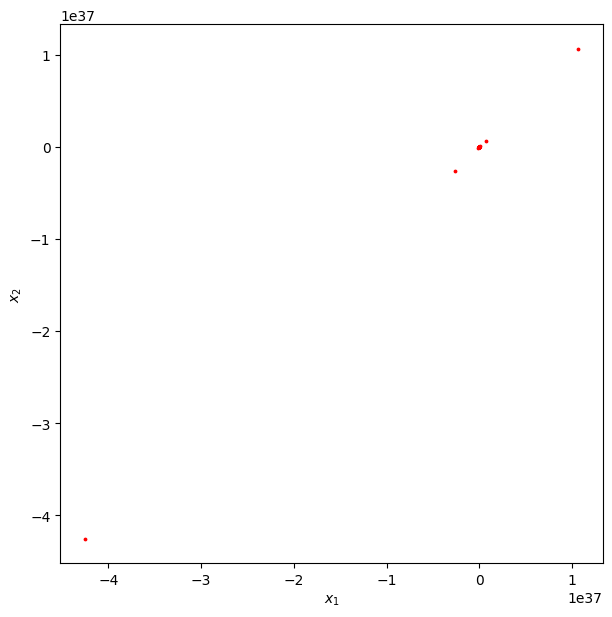

In [ ]:
import torch

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.25)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()

for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=3, c='r');
#plt.scatter - добавление точек на график
#первые два массива задают координаты точек Х и У, s - размер, с - цвет

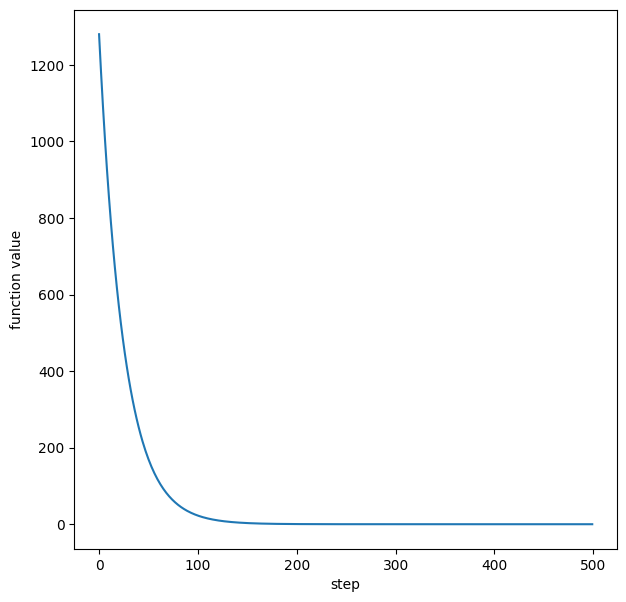

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

Уменьшение происходит экспоненциально

# Задачи решаемы при помощи нейронных сетей

## Бинарная классификация, бинарная кросс-энтропия

Выбор функции потерь не зависит от характеристики модели

$$ \sigma'(y) = \sigma(y)(1 - \sigma(y))$$

$$MSE = (\sigma(y) - t)^2$$

$$MSE' = 2*(\sigma(y)-t)*\sigma(y)*(1-\sigma(y))$$

Здесь есть проблема, которая называется "паралич сигмоидной нейронной сети"

Суть: даже если у нас большое количество ошибки, всё равно возможна ситуация, когда производная будет равняться нулю, соответственно, если мы будем учить такую нейронную сеть при попомощи градиентного спуска, то у нас ничего не получится.

Вывод: плохая идея использовать функцию среднеквадратической ошибки в качестве функции потерь вместе с сигмоидной функцией активации на последнем слое

Что можно использовать в качестве функции потерь с сигмоидной функцией активации?

В качестве потерь с сигмоидной функцией активации можно использовать функцию "Бинарная кросс-энтропия"
$$
 BCE(p, t) = -t \log(p) - (1-t)\log(1-p)
$$

$$
p = \sigma(y)
$$

$$
\frac{\partial BCE}{\partial y} = \frac{\partial BCE}{\partial p} \frac{\partial p}{\partial y} = -\frac{t}{\sigma} \sigma' + \frac{1-t}{1-\sigma}\sigma'= -t(1-\sigma) + (1-t)\sigma = \sigma - t
$$

Бинарная кросс-энтропия - функция потерь, которая хорошо оценивает вероятности и любые значения, которые находятся в интервале от $[0,1]$

## Многоклассофая классификация. Софтмакс

Для решения многоклассовой классификации предлагается сделать по одному выходу на каждый класс. Для получения вероятности для каждого класса будем использовать другой подход

Сумма всех вероятностей(выходов) должна равняться единице.

В таком примере в качестве функции активации мы будем применять функцию "СофтМакс"

$$
SM_i(\vec{y})=\frac{e^{y_i}}{\sum^N_{j=1} e^{y_j}}
$$

Мы берём все выходы из сети и в эту степень возводим экспоненту. После этого для того, чтобы получить вероятность какого-то класса, мы берём экспоненту, которая соответствует этому классу, и делим на сумму всех экспонент

Свойства софт макс функции:
- $0<SM<1$
- $\sum_{i=1}^N SM_i = 1$

Продифференцируем софтмакс функцию:
$$
\frac{\partial SM_i}{\partial y_c} = \frac{-e^{y_i}e^{y_c}}{(\sum^N_{j=1}e^{y_j})^2}; y_c \neq y_i
$$
$y_c$ - некоторый выход из нейронной сети

Производная софтмакса по выходу:
$$
\frac{\partial SM_i}{\partial y_i}=\frac{e^{y_i}*\sum^n_{j=1}e^{y_j} - e^{y_i}*e^{y_i}}{(\sum_{j=1}^N e^{y_j})^2} = SM_i(1-SM_i)
$$

$$
\frac{\partial}{\partial y_i} \sum^n_{j=1} e^{y_j} = \frac{\partial}{\partial y_i} e^{y_i} = e^{y_i}
$$

Функция активации - софтмакс
Функция потерь - кросс энтропия
$$
CE(p,t) = - \sum^N_{c=1}t_c \log p_c
$$

Кросс энтропия - минус сумма всех классов от 1 до N.

$t_c$ - таргетное значение для класса

$p_c$ - вероятность этого класса

Верояность класса - софтмакс от выходов из нейронной сети.

Таргетное значение для класса - ноль почти для всех классов кроме одного, который присутствует на этой картинке

Когда у нас будет два класса, софтмакс будет выглядеть как сигмоида. Кросс энтропия на два класса выглядит как бинарная кросс энтропия

Убедимся, что кросс энтропия - хорошая функция потерь для функции активации софтмакс

$$
\frac{\partial CE}{\partial y_i} = -\frac{t_i}{p_i} \frac{\partial SM_i}{\partial y_i} - \sum_{c \neq i} \frac{t_c}{p_c} \frac{\partial SM_c}{\partial y_i} = - \frac{t_i}{p_i} p_i(1-p_i)+ \sum_{c \neq i} t_c \frac{1}{p_c} p_i p_c = -t_i(1-p_i) + \sum_{c \neq i} t_c p_i = -t_i + p_i
$$

Производная кросс энтропии по выходу из нейронной сети линейна

Софт макс не совсем функция активации


## Локализация, детекция, сегментация и super-resolution

### Задача локализации и детекции

У нас есть картинка. На этой картинке где-то есть объект. Что нужно сделать для решения этой задачи?

- Один из выходов нейронной сети должен говорить о вероятности нахождения на картинке объекта. (p)
- Параметризация прямоугольника, включащего в себя объект $x_c, y_c$ - координаты центра
- ширина (w) и высота (h)

Эта задача будет решаться с некоторым количеством ограничений:
- на картинке может быть либо один объект, либо ни одного
- если центр объекта лежит в пределах картинки, то мы считаем, что объект на картинке есть, в ином случае, мы считаем, что его нет.
- объект может выходить за пределы картинки

На выход вероятности можно использовать сигмоидную функцию активации.

На выходы центра можно также использовать сигмоидную функции активации. Таким образом мы сможем задать центр объекта относительно картинки.

Высота и ширина - экспоненты от соответствующих выходов

На выходы вероятности, центра в качестве функции потерь можно использовать бинарную кросс энтропию

В качестве функции потерь для высоты и ширины можно использовать средний квадрат ошибки от выхода сети до функции активации с логарифмом таргетного значения

$$
p = \sigma(y_0);    BCE(\sigma(y_0), \widetilde{I})\\
x_c = \sigma(y_1);  BCE(\sigma(y_1), \widetilde{x_c})\\
y_c = \sigma(y_2);  BCE(\sigma(y_2), \widetilde{y_c})\\
w = \exp(y_3);      MSE(y_3, \log{\widetilde w})\\
h = \exp(y_4);      MSE(y_4, \log{\widetilde h})
$$

$$
L = BCE(\sigma(y_0), \widetilde{w}) + \widetilde I \Bigg(BCE(\sigma(y_1), \widetilde{x_c})+BCE(\sigma(y_2), \widetilde{y_c})+MSE(y_3, \log{\widetilde w}))+MSE(y_4, \log{\widetilde h}\Bigg)
$$

### Сегментация

На выходе из нейросети будет картинка, где каждый пиксель дифференцируется(есть кот или нет)

Функция активации - сигмоида
Функция потерь - бинарная кросс энтропия по каждому пикселю и сложения по всех картинке

$$
L = \sum_j BCE(\sigma(y_j), t_j)
$$

### Задача сжатия размерности

Это задача попадает в разряд задач обучения без учителя.

Сделать сеть, которую будем называть кодировщиком(инкодер). Она будет выдавать сжатое представление картинки(имбеддинг). Это изображение мы будем расшифровать при помощи сети, которая называется декодировщик(декодер). В результате мы должны получать такую же картинку, какая была на входе.

В качестве лосс функции можно взять среднеквадратичную ошибку между тем, что было и что получилось.

$$
L = \sum_j MSE(Img_j, \widetilde{Img_j})
$$

### Задача SuperResolution

Cуть: увеличени изображения

Мы берём картинки, сжимаем их, отдаём нейросети и результат сравниваем с исходным

## Строим первую нейронную сеть

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)
# .rcParams - словарь из глобальный настроек графиков
# figure.figsize - размер графика

### Тренировочный датасет

Text(0.5, 1.0, '$y=sin(x)$')

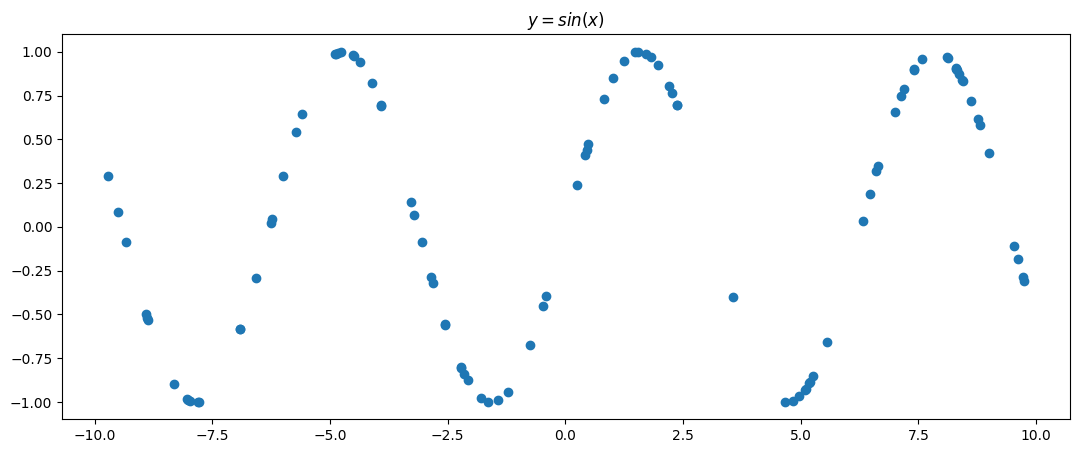

In [ ]:
x_train = torch.rand(100) #сто рандомных точек в интервале от 0 до 1. генерация из равномерного распределения
x_train = x_train * 20 - 10 #расставляем точки примерно по центру графика
y_train = torch.sin(x_train) #так как мы будем решать задачу регрессии для синуса, то игрик - синус от икса
plt.plot(x_train.numpy(), y_train.numpy(), 'o') #создаём график, передаём координаты точек по иксу и по игреку, "о" - стиль, в нашем случае точка
plt.title('$y=sin(x)$') #названия графика в латех представлении

Обучающая выборка выглядит просто, поэтому мы добавим в неё немного шума

Text(0.5, 1.0, 'Gaussian noise')

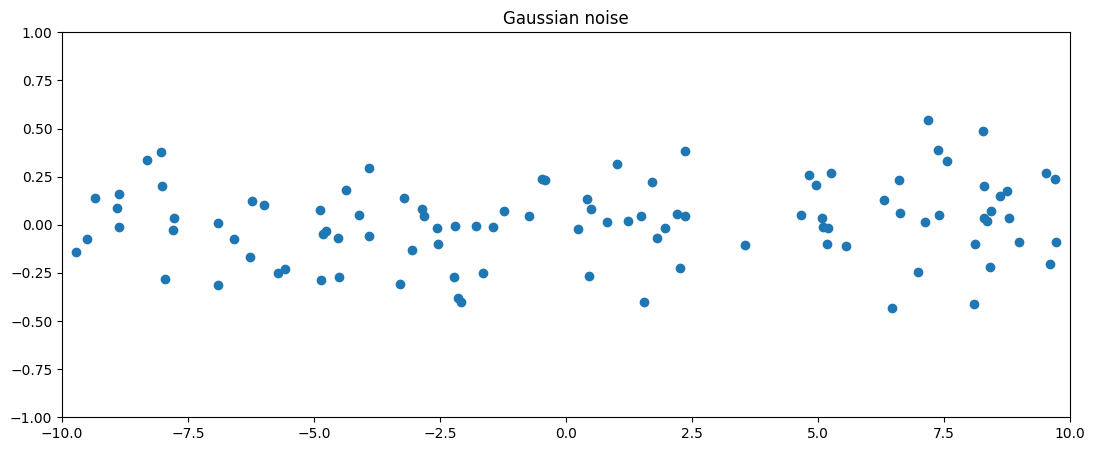

In [ ]:
noise = torch.randn(y_train.shape) / 5 #генерация из нормального распределения
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1]) #задаём максимальная и минимальные значения осей по иксу и игреку
plt.title('Gaussian noise')

Этот шум прибавим к каждой точке предыдущего графика(по игреку)

Text(0, 0.5, 'y_train')

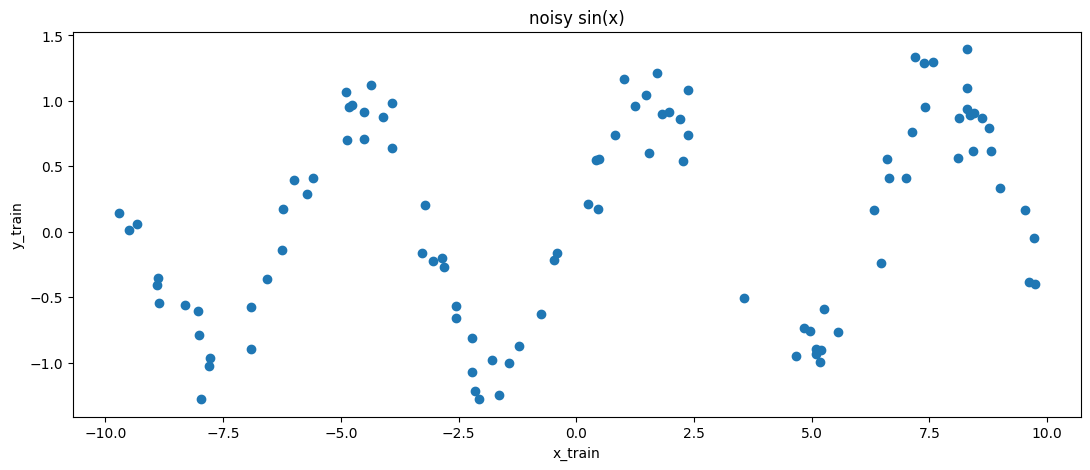

In [ ]:
y_train += noise
plt.plot(x_train, y_train, 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train') #название осей
plt.ylabel('y_train')

когда мы будем передавать в нейросеть данные, необходимо сделать их правильной размерности. Это делает метод .unsqeeze(1)

In [ ]:
x_train.unsqueeze_(1) #транспонирование одномерного вектора. Нижние подчеркивание означает трансформацию объекта
y_train.unsqueeze_(1); #точка с запятой, чтобы не видеть вывод

### Validation dataset

Text(0, 0.5, 'y_validation')

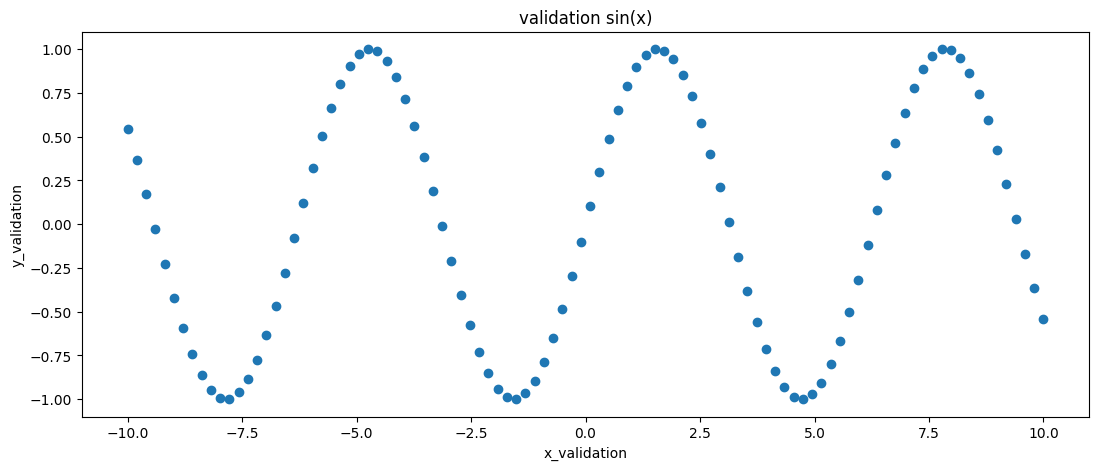

In [ ]:
x_validation = torch.linspace(-10,10,100) #создание 100 точек равномерно распределённых вдоль интервала [-10, 10]
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('validation sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1); # установка правильной размерности

### model construction

In [ ]:
class SineNet(torch.nn.Module): #мы наследуем от данного модуля, потому что в нём есть необходимые нам модули
  def __init__(self, n_hidden_neurons): #функция инициализации. В неё передаются те аргументы, что используются в момент конструирования нейросети
    #мы передаём количество нейронов скрытого слоя
    #мы предполагаем, что все слои будут одинакового размера
    #когда мы создаём слои, они инициализируются некоторыми случайными числами

    super(SineNet, self).__init__() #инициализируем родительский объект

    #теперь создаём слои
    #первый слой fc1 - fully connected layer. Он полносвязный
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons) #в пайторче полносвязные слой называется Linear
    #мы передаём количество входных нейронов(1) и количество выходных нейронов (n_hidden_neurons)
    #это по сути не сам нейрон, а вход в него, координата нашей точки, по которой мы будем что-то предсказывать

    #создаём функцию активации
    self.act1 = torch.nn.Sigmoid()
    #будем использовать сигмоидную функцию активации

    #создадим ещё один полносвязный слой. Это будет один нейрон. Он будет ответом на вопрос
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  #теперь необходимо написать функцию описывающую то, как наши слои последовательно применяются
  def forward(self, x): #x - переменная, с которой мы будем работать
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sine_net = SineNet(50) #создание нейросети

### Prediction

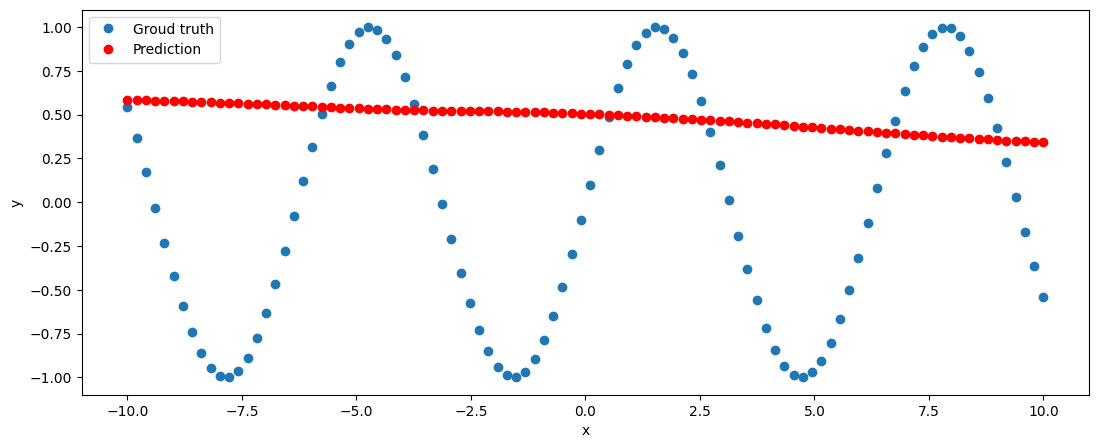

In [ ]:
def predict(net, x, y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
  plt.legend(loc = 'upper left')
  plt.xlabel('x')
  plt.ylabel('y')
predict(sine_net, x_validation, y_validation)

### Optimizer

In [ ]:
#оптимизатор - объект, совершающий шаги градиентного спуска
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)
#.parameters - веса нейронной сети

### Loss function

In [ ]:
def loss(pred, target):
  squares = (pred - target) ** 2 #MSE function
  return squares.mean()

### Training procedure

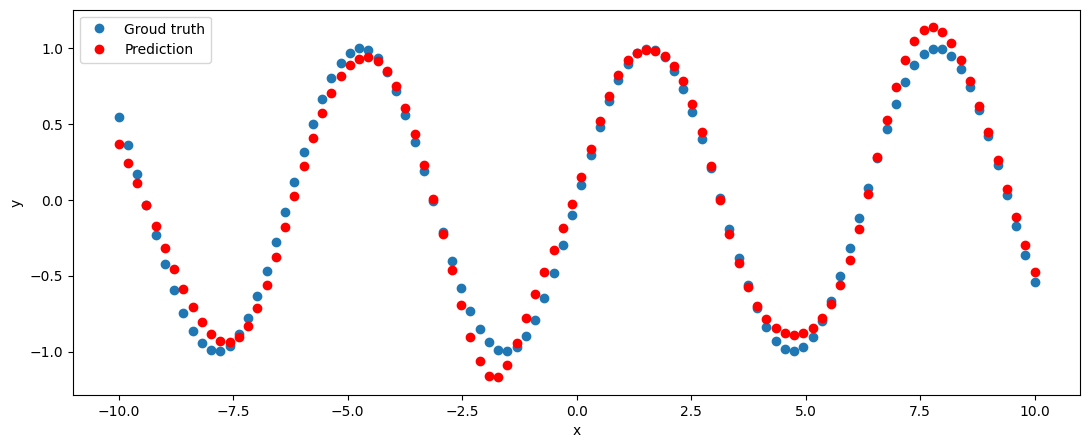

In [ ]:
for epoch_index in range(2000):
  optimizer.zero_grad()
  #сначала зануляем градиент

  y_pred = sine_net.forward(x_train)
  #скармливаем датасет нашей нейросети

  loss_val = loss(y_pred, y_train)
  #значение потерь

  loss_val.backward()
  #подсчёт градиентов

  optimizer.step()
  #шаг градиента

predict(sine_net, x_validation, y_validation)

## Классификация в pytorch

Каждый раз генерируются рандомные значения. Из-за этого тяжело отслеживать то, что улучается наша сеть или. Для этого надо зафиксировать рандомный сид

In [ ]:
import torch
import random
import numpy as np

random.seed(0) #установка сид генератора случайных чисел модуля рандом
np.random.seed(0) #установка сида генератора случайных чисел нампая
torch.manual_seed(0) #установка сида генератора случайных чисел пайторча на cpu
torch.cuda.manual_seed(0) #установка сида генератора случайных чисел пайторча на gpu
torch.backends.cudnn.deterministic = True #добавление возможности воспроизводимости результата при использовании библиотеки CuDNN для вычисления на gpu

Для задачи классификации будем использовать датасет wine

In [ ]:
import sklearn.datasets #в этом модуле есть датасет wine
wine = sklearn.datasets.load_wine() #импорт датасета wine
wine.data.shape #178 различных бутылок вин. У каждой 13 параметров. Есть три класса, на которые можно классифицировать конкретную бутылку

(178, 13)

In [ ]:
from sklearn.model_selection import train_test_split #импорт необходимой функции

X_train, X_test, Y_train, Y_test = train_test_split( #разбиение на тренировочный и тестирующий датасеты
    wine.data[:, :2], #указываем датасет, в нашем случае первые две калонки для удобства визуализации
    wine.target, #таргетные значения
    test_size = 0.3, #указываем размер тестирующей выборки
    shuffle = True #перемешиваем датасет на случай, если он был отсортирован
)
X_train = torch.FloatTensor(X_train) #дробное число
X_test = torch.FloatTensor(X_test) #дробное число
Y_train = torch.LongTensor(Y_train) #целые числа
Y_test = torch.LongTensor(Y_test) #целые числа

In [ ]:
class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(WineNet, self).__init__()
    self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    #self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    #self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.sm = torch.nn.Softmax(dim = 1) #применение функции по каждой строке

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    #x = self.fc2(x)
    #x = self.act2(x)
    x = self.fc3(x)
    return(x)
    #поскольку функция потерь - кросс энтропия, то нам нужны выходы, а не результат после софтмакса. Поэтому софтмакс будет отдельно
    #функция софтмакс долгая для вычисления, поэтому для оптимизации мы её считаем позже.
    #из-за того, что софтмакс долгая для вычисления, её нужно стараться избегать

  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x

wine_net = WineNet(12)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
#функция кросс энтропии использующая выходы до их прохода через софтмакс

optimizer = torch.optim.Adam(wine_net.parameters(), lr=0.02) #0.001 - стандартное значение обучения

In [ ]:
np.random.permutation(5)

array([2, 1, 4, 0, 3])

In [ ]:
batch_size = len(X_train)

for epoch in range(10000):
  order = np.random.permutation(len(X_train)) #индексы
  #мы будем из порядка вырезать участки длиной batch_size
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index + batch_size]

    x_batch = X_train[batch_indexes]
    y_batch = Y_train[batch_indexes]

    preds = wine_net.forward(x_batch)

    loss_val = loss(preds, y_batch)
    loss_val.backward()

    optimizer.step()

  if epoch % 100 == 0:
    test_preds = wine_net.forward(X_test)
    test_preds = test_preds.argmax(dim = 1) #максимальный выход по строкам
    print((test_preds == Y_test).float().mean())

tensor(0.3889)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.7963)
tensor(0.7963)
tensor(0.7593)
tensor(0.7593)
tensor(0.7593)
tensor(0.7593)
tensor(0.7593)
tensor(0.7593)
tensor(0.7407)
tensor(0.7407)
tensor(0.7593)
tensor(0.7593)
tensor(0.7963)
tensor(0.7593)
tensor(0.7963)
tensor(0.7963)
tensor(0.7778)
tensor(0.7963)
tensor(0.7963)
tensor(0.7963)
tensor(0.8148)
tensor(0.7963)
tensor(0.7963)
tensor(0.8148)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.7963)
tensor(0.7963)
tensor(0.7963)
tensor(0.7963)
tensor(0.8148)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.7963)
tensor(0.8148)
tensor(0.8

<ipython-input-17-8acdcb632144>:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  plt.scatter(X_train[indexes, 0],
<ipython-input-17-8acdcb632144>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[indexes, 0],


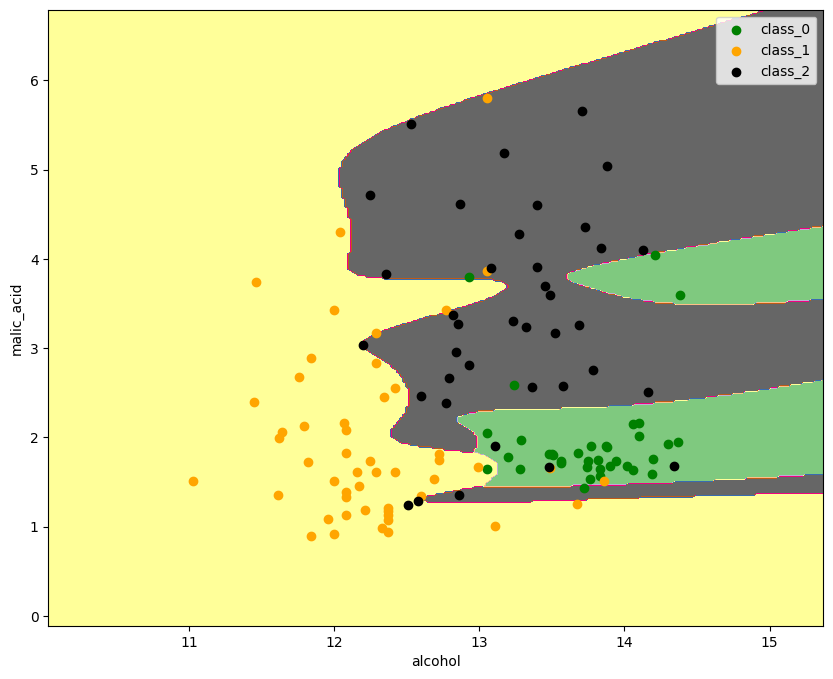

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем размеры графика
plt.rcParams['figure.figsize'] = (10, 8)

# Задаем количество классов, цвета и шаг для отображения
n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

# Определяем диапазоны значений для осей x и y
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Создаем сетку точек для отображения
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Преобразуем входные данные в тензор PyTorch
input_data = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Передаем данные через модель
with torch.no_grad():
    intermediate = wine_net.fc1(input_data)
    intermediate = wine_net.act1(intermediate)
    preds = wine_net.fc3(intermediate)
    preds = wine_net.sm(preds)  # Применяем софтмакс для получения вероятностей классов

# Преобразуем предсказания в массив NumPy
preds_class = preds.argmax(dim=1).detach().numpy()
preds_class = preds_class.reshape(xx.shape)

# Отображаем контурные линии предсказанных классов
plt.contourf(xx, yy, preds_class, cmap='Accent')

# Отображаем обучающие точки
for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(Y_train == i)
    plt.scatter(X_train[indexes, 0],
                X_train[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')

# Добавляем подписи осей и легенду
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()

# Отображаем график
plt.show()


# Методы оптимизации

## Самый обычный градиентный спуск

Для того, чтобы понять, в какую сторону loss function необходимо двигаться, необходимы оптимизаторы.

Оптимизаторы(методы оптимизации) применяются в нейронных сетях.

Наиболее распространнёным и наиболее простым является градиентный спуск.

$$
\nabla f = \left(
  \begin{array}{c}
  \frac{\partial f}{\partial w_0}\\
  \frac{\partial f}{\partial w_1}\\
  \vdots\\
  \frac{\partial f}{\partial w_n}
  \end{array}
  \right)
$$

Если мы начали в точке $w_0$, то после градиентного шага мы окажемся в точке:

$$
w_1 = w_0 - \alpha \nabla f(w_0)
$$

Следующий шаг:

$$
w_2 = w_1 - \alpha \nabla f(w_1)
$$

Таким образом мы можем делать много-много раз:

$$
w_n = w_{n-1} - \alpha \nabla f(w_{n-1})
$$

В конце концов мы сможем попасть примерно в локальный минимум.

Недостатком градиентного спуска является то, что нам необходимо посчитать функцию потерь по всем параметрам обучающей выборки. В этом случае мы потратим слишком много времени, чтобы сделать один небольшой шаг.

Градиент функции по одному примеру - стохастический градиентный спуск.

Побатчевый градиентый спуск - мы вычисляем функцию потерь на нескольких примерах:

$$
  f = f_1 + f_2 + f_3 + ... + f_n
$$

Мы можем вычислять на выборке $(f_1, f_3, f_n)$. На этих трёх примерах мы считаем градиент loss function, усредняем или складываем (зависит от loss function), дальше мы посчитали градиент, домножиле на learning rate, и теперь мы готовы делать шаг.

$$
w_1 = w_0 - \alpha \nabla f_{b_1}(w_0)\\
w_2 = w_1 - \alpha \nabla f_{b_2}(w_1)\\
w_3 = w_2 - \alpha \nabla f_{b_3}(w_2)\\
\vdots\\
w_{t+1} = w_t - \alpha \nabla f_{b_n}(w_t)\\
$$

Есть некоторое правило о том, как выбирать размер батча:

$$
1 << |b| << N
$$

## Модификации градиентного спуска

### Стохастический градиентный спуск с импульсом

Побатчевый градиентный спуск также называется стохастическим градиетным спуском в пакетах для обучения нейронных сетей. Это алгоритм хорош всем:
- он достаточно быстро вычисляет, насколько нужно обновить текущие веса модели для того, чтобы улучшить её производительность для того, чтобы уменьшить функцию потерь.

Однако у него есть серьёзный недостаток:
- в вытянутный линиях уровня нужно сделать много шагов, чтобы приблизиться к локальному минимому.

Это алгоритм будет работать лучше, если его поведение представить в виде катящегося шара.

Модель:
$$
\begin{equation*}
  \begin{cases}
  \frac{\partial v}{\partial t} = \frac{1}{m}(F + F_{тр})\\
  \frac{\partial x}{\partial t} = v
  \end{cases}
\end{equation*}
$$

Первое уравнение - второй закон Ньютона.
Второе уравнение - определения понятния скорости.

В нашем случае модель будет выглядет следующим образом:

$$
\begin{cases}
  \frac{\partial v}{\partial t} = - \frac{1}{m} \nabla f - \frac{1}{m} \eta  v\\
  \frac{\partial x}{\partial t} = v
\end{cases}
$$

Для решения данной системы уравнений мы будем использовать метод конечных разностей. Это метод используется для численного решения дифференциальных уровней.

Что такое метод конечных разностей?

Определение производной:

$$
\frac{\partial f}{\partial x} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

Из этого определения мы уберём предел и получим конечную разность:

$$
\frac{\partial f}{\partial x} \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

При помощи конечной разности приблизим производную скорости по времени и производную параметров по времени

$$
\begin{array}{c|}
  \frac{\partial v}{\partial t} = \frac{v^{t+1} - v^t}{\Delta t}\\
  \frac{\partial x}{\partial t} = \frac{x^{t+1} - x^t}{\Delta t}
\end{array}
$$

Подставим эти приблизительный равенства в исходную систему уравнений, и выразим скорость и координату в следующий момент времени через скорости и координаты в текущий момент времени:

$$
\begin{cases}
  v^{t+1} = v^t - \frac{\Delta t}{m} \nabla f - \frac{\Delta t}{m}\eta v^t\\
  w^{t+1} = w^t + v^t \Delta t
\end{cases}
$$

При условии, что $[\Delta t = \alpha]$, $[\frac{\Delta t}{m} = 1]$, $[(1 - \eta \frac{\Delta t}{m}) = \beta]$:

\begin{cases}
  w^{t+1} = w^t + \alpha v^t\\
  v^{t+1} = v^t \beta - \nabla f
\end{cases}

Эта формула градиентно спуска описывает алгоритм стохастического градиентного спуска с импульсом. У этого алгоритма есть два параметра.

$\alpha$ - скорость обучения

$\beta$ - коэффициент импульса

### Стохастический градиентный спуск с заглядывание вперёд

Есть ещё одна модификация этого алгоритма с градиентным спуском, которая называется стохастические градиентный спуск с импульсом с заглядыванием вперёд.

Суть: мы вычисляем градиент функции потерь в той точке, в которую мы попали бы, если бы мы продолжали двигаться с той же скоростью с какой двигались бы сейчас.

Этот алгоритм чуть-чуть быстрее сходится чем стохастический градиентый спуск

Почему стохастический градиентный спуск с импульсом работает?

В стохастическом градиентном спуске с импульсом за пару итераций мало изменяется не координата, а скорость. Скорость может накапливаться.

Поскольку теперь градиент loss function теперь влияет не на координату, а на скорость, то вдоль направления, вдоль которого градент функции всё время изменяет знак, в сумме будет практически ноль. Вдоль направления, вдоль которого градиент стабильно даёт один и тот же знак, будет существенно отличаться от нулю.

Есть ещё один алгоритм, который похож на стохастический градиентный спуск с моментом. Выглядит он следующим образом:

$$
w^{t+1} = w^t - \alpha EMA(\nabla f)^t
$$

EMA - экспоненциальное скользящее среднее.

$$
EMA_{\beta}(f)^t = (1 - \beta) f^t + \beta * EMA_{\beta}(f)^{t-1}
$$

Это почти то же самое, что и стохастический градиентный спуск с импульсом. Почему в стохастическом градиентном спуске с импульсом у нас к скорости приблавлялись градиенты loss function, а здесь к координате прибавляется усреднённые градиенты loss function. Раньше усреднение происходило в параметре скорости, а теперь усреднение происходит в экспоненциальном скользящем среднем. В остальном это практически идентичные вещи.

### RPROP

Есть несколько методов, которые раньше использовались в нейронный сетях. Один из них - rprop.

rprop - метод, учитывающий не градиент, а знак градиента.

$$
w_i^{t+1} = w_i^t - \alpha_i^t sign(\nabla f_i(w_t))
$$

Скорости обучения для каждого из параметров тоже изменяются.

$$
\begin{equation*}
  \alpha_i^{t+1} =
  \begin{cases}
    \alpha^t * 1.2, & \text{if } sign(\nabla f_i(w_t) * \nabla f_i (w_      {t-1})) > 0 \\
    \alpha^t * 0.6, & \text{if } sign(\nabla f_i(w_t) * \nabla f_i (w_{t-1})) \leq 0
  \end{cases}
\end{equation*}
$$

Недостатоток этого метода: этот метод плохо работает с батчами. Оптимизацию приходится проводиться для каждого отдельного элемента.

### RMSprop

$$
w^{t+1} = w_t - alpha \frac{\nabla f(w^t}{\sqrt{EMA_i(\nabla f^2)^t}}
$$

$$
\begin{equation*}
  \nabla f^2 =
  \begin{bmatrix}
    \frac{\partial f^2}{\partial w_0}\\
    \frac{\partial f^2}{\partial w_1}\\
    \vdots\\
    \frac{\partial f^2}{\partial w_n}
  \end{bmatrix}
\end{equation*}
$$

Интуиция этого алгоритма заключается в том, что если вдоль какого-то направления производная слишком большая, это означает, что вдоль этого направления нужно идти чуть-чуть помедленне, потому что слишком быстро изменяется функция потерь по этому направлению. А если вдоль какого-то направленя функция потерь слишком маленькая, то вдоль этого параметр нужна идти чуть-чуть побыстрее, потому что функция потерь вдоль этого параметра изменяется слишком медленно.

Таким образом у нас подстраивается функция обучения под каждый из параметров.

Преимущества алгоритма RMSprop заключается в том, что если вдоль некоторого параметра у нас производная слишком большая, это означает что функция потерь слишком быстро изменяется, и это означает, что нужно делать шаги поменьше. Если же вдоль какого-то другого параметра функция потерь слишком медленно изменяется, это означает, что шаги надо делать побольше. В среднем же наши шаги вдоль любого параметра должны быть размера $\alpha$

Таким образом можно считать, что RMSprop делает следующее: RMSprop берёт некоторый параметр и изменяет на значение $\alpha$ в направлении обратно направлении производной функции потерь по этому параметру.

RMSprop берёт некоторую сетку и находит такой узел этой сетки, где значение функции потерь минимально.

### Adam

$$
w^{t+1} = w^t - \alpha \frac{EMA_{\beta_1}(\nabla f)^t}{\sqrt{EMA_{\beta_2}(\nabla f^2)^t} + \epsilon}
$$

Этот метод оптимизации объединяет положительные качества как стохастического градиентного спуска с импульсом, так и метода RMSprop.

Это очень распространённый на сегодняшний день метод оптимизации нейронных сетей.

Его преимуществом является то, что для него не нужно подбирать параметры.

Оптимальные параметры:

$$
\alpha = 3*10^{-4}\\
\beta_1 = 0.9\\
\beta_2 = 0.999
$$

С такими параметрами практически любая нейронная сеть, оптимизированная адамом, научится некоторым хорошим результатам.

Бывает так, что некоторые нейронные сети лучше учатся с другими параметрами алгоритма Адам. Однако для очень большого класса нейронных сетей данные параметры показывают очень хорошие результаты.

Если необходимо быстро обучить нейронную сеть, то можно взять оптимизатор Адам с такими параметрами, и получится некоторый хороший результат.

Если необходимо создать очень хорошо оптимизированную под текущую задачу нейронную сеть, то берут стохастический градиентный спуск, и уже для него следует подбирать lerning rate для того, чтобы он хорошо решал задачу.

## Классификация рукописных чисел полносвязной сетью

In [ ]:
import torch
import numpy as np
import random

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets

mnist_train = torchvision.datasets.MNIST('./', download = True, train = True)
mnist_test = torchvision.datasets.MNIST('./', download = True, train = False)

In [ ]:
x_train = mnist_train.data
y_train = mnist_train.targets
x_test = mnist_test.data
y_test = mnist_test.targets

In [ ]:
x_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [ ]:
x_train = x_train.float()
x_test = x_test.float()

In [ ]:
x_train.shape, x_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

tensor(4)


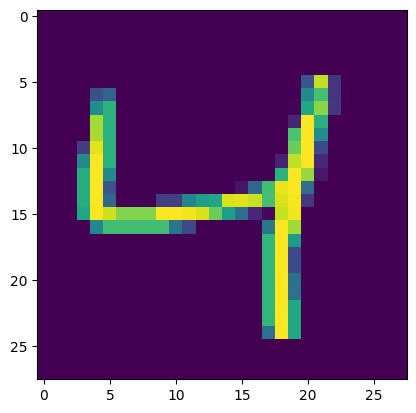

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2, :, :])
print(y_train[2])

In [ ]:
x_train = x_train.reshape([-1, 28*28]) # '-1' - размерность изменится так, чтобы число элементов осталось неизменным,
#а размерность по второму измерению было 28*28
x_test = x_test.reshape([-1, 28*28])


In [ ]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

mnist_net = MNISTNet(100)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi #проверка, чем занята сейчас видеокарта

Mon Jun 26 21:22:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    30W /  70W |   1383MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters());

In [ ]:
loss = torch.nn.CrossEntropyLoss() #для классификации используют эту функцию
optimizer = torch.optim.Adam(mnist_net.parameters(), lr = 1.0e-3)

In [ ]:
from tqdm import tqdm_notebook as tqdm
batch_size = 100
x_test = x_test.to(device)
y_test = y_test.to(device)
test_accuracy_history = []
test_loss_history = []

for epoch in tqdm(range(100), desc = 'learning'):
  order = np.random.permutation(len(x_train))

  for start_index in tqdm(range(0, len(x_train), batch_size), desc = str(epoch) + ' epoch'):

    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    x_batch = x_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = mnist_net.forward(x_batch)

    loss_vall = loss(preds, y_batch)
    loss_vall.backward()

    optimizer.step()

  test_preds = mnist_net.forward(x_test)
  test_loss_history.append(loss(test_preds, y_test).cpu())
  accuracy = ((test_preds.argmax(dim=1) == y_test).float().mean().cpu())
  test_accuracy_history.append(accuracy.data)
  print(accuracy)

<ipython-input-57-f1eb7bc9ddc9>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(100), desc = 'learning'):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-57-f1eb7bc9ddc9>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for start_index in tqdm(range(0, len(x_train), batch_size), desc = str(epoch) + ' epoch'):


0 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9111)


1 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9212)


2 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9182)


3 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9214)


4 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9270)


5 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9207)


6 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9321)


7 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9286)


8 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9260)


9 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9369)


10 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9347)


11 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9327)


12 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9351)


13 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9402)


14 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9401)


15 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9368)


16 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9372)


17 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9369)


18 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9402)


19 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9405)


20 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9380)


21 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9408)


22 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9443)


23 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9413)


24 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9457)


25 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9445)


26 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9405)


27 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9405)


28 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9440)


29 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9426)


30 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9456)


31 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9433)


32 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9478)


33 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9425)


34 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9481)


35 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9487)


36 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9449)


37 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9446)


38 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9502)


39 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9477)


40 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9490)


41 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9471)


42 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9477)


43 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9523)


44 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9483)


45 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9505)


46 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9503)


47 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9492)


48 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9499)


49 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9506)


50 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9487)


51 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9515)


52 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9498)


53 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9514)


54 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9484)


55 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9463)


56 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9524)


57 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9550)


58 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9562)


59 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9533)


60 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9507)


61 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9513)


62 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9536)


63 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9531)


64 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9526)


65 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9471)


66 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9543)


67 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9524)


68 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9530)


69 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9525)


70 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9530)


71 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9551)


72 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9530)


73 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9555)


74 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9542)


75 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9508)


76 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9571)


77 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9551)


78 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9566)


79 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9504)


80 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9541)


81 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9583)


82 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9539)


83 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9550)


84 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9544)


85 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9579)


86 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9566)


87 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9575)


88 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9572)


89 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9591)


90 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9592)


91 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9574)


92 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9569)


93 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9589)


94 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9570)


95 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9594)


96 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9579)


97 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9588)


98 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9583)


99 epoch:   0%|          | 0/600 [00:00<?, ?it/s]

tensor(0.9612)


Text(0, 0.5, 'value')

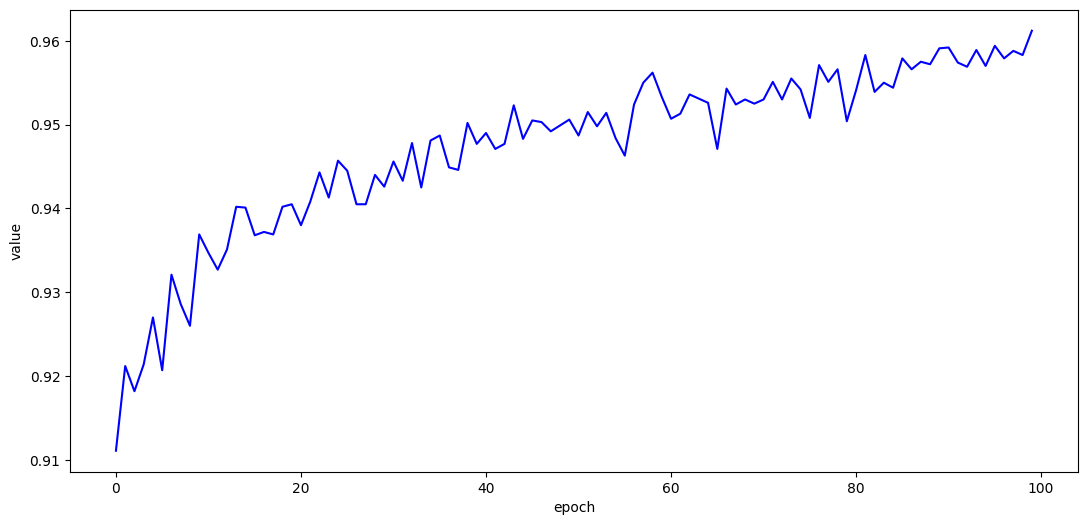

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)
test_loss_history = [i.data for i in test_loss_history]
plt.plot(test_accuracy_history, c='blue', label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('value')

Text(0, 0.5, 'value')

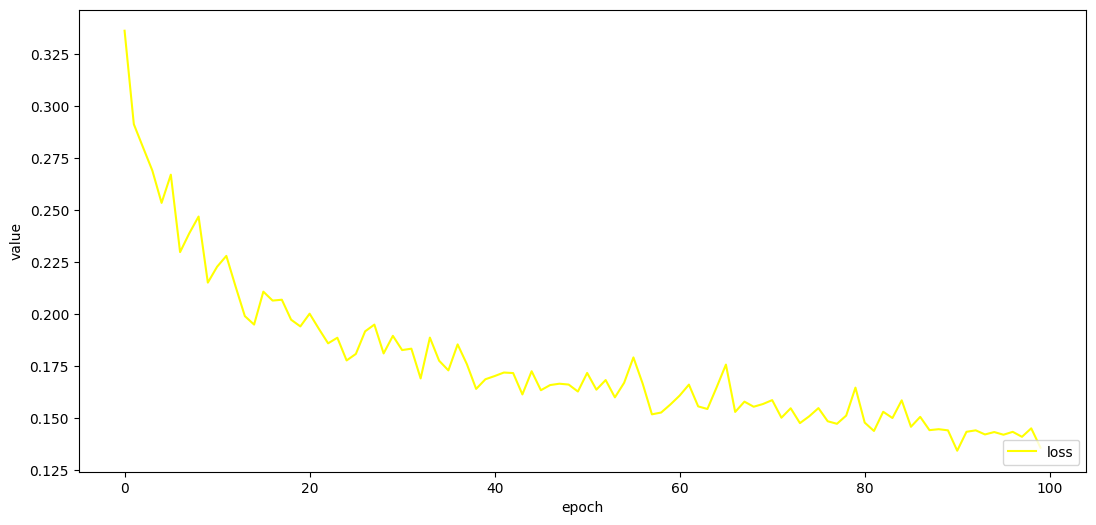

In [ ]:
plt.plot(test_loss_history, c = 'yellow', label = 'loss')
plt.legend(loc = 'lower right')
plt.xlabel('epoch')
plt.ylabel('value')

# Свёрточные нейронные сети

## Свёртка, каскад свёрток

Сигмоидные нейронные сети полны. При помощи них можно восстановить любую зависимость с любой точностью.

Несмотря на то, что сигмоидные нейронные сети могут подогнать любую функцию, которая удовлетворяет списку требований, у таких сетей возникают проблемы со структурированными данными, например, с картинкой.

Если такая сеть увидет знакомый объект в середине, то она не распознает такой же объект в углу. Чтобы избежать таких ситуаций, нам нужны свёрточные нейронные сети, которые будут обобщаться в независимости от положения изображения на картинке.

Весь объём картинок мы не можем покрыть обучающей выборкой, поскольку должна быть очень большая обучающая выборка, в которой будут все варианты расположения объекта. Для того, чтобы запомнить все положения, понадобится очень большое количество нейронов. Таким образом наша нейронная сеть будет занимать очень много места.

Операция свёртки инвариантна относительно положения объекта.

При помощи свёртки мы решаем проблему ограниченности вычислительных ресурсов.

Свёртка решает задача учёта дополнительной информации о структуре данных.

Принцип работы свёртки. Возьмём базовое изображение:

$$
\begin{bmatrix}
  5 & 2 & 3 & 1 & -2\\
  3 & 1 & 1 & 0 & 4\\
  6 & 2 & 1 & 0 & -1\\
  4 & 7 & 2 & 1 & 0\\
  3 & 6 & 2 & 2 & 1\\
\end{bmatrix}
$$

Стоит отметь, что свёртка работает хорошо не только с изображениями, но и с другими структурами данных.

Как происходит свёртка:

Сначала мы расширим массив пикселей:

$$
\begin{bmatrix}
  0 & 0 & 0 & 0 & 0 & 0 & 0\\
  0 & 5 & 2 & 3 & 1 & -2 & 0\\
  0 & 3 & 1 & 1 & 0 & 4 & 0\\
  0 & 6 & 2 & 1 & 0 & -1 & 0\\
  0 & 4 & 7 & 2 & 1 & 0 & 0\\
  0 & 3 & 6 & 2 & 2 & 1 & 0\\
  0 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

Эти нули называются padding или оступ. Эти нули нужны для этого, чтобы приложить маску к некоторой позиции в изображении.

Далее возьмём некоторую маску:

$$
\begin{bmatrix}
  1 & 0 & -1\\
  0 & 1 & 0\\
  -1 & 0 & 1
\end{bmatrix}
$$

Такая маска называется ядром свёртки.

Перемножаем коэффиценты из маски с пикселями на изображении, складываем и получаем некоторый результат:

$$
\begin{bmatrix}
  1 & 0 & -1\\
  0 & 1 & 0\\
  -1 & 0 & 1
\end{bmatrix} \circ
\begin{bmatrix}
  0 & 0 & 0\\
  0 & 5 & 2\\
  0 & 3 & 1 \\
\end{bmatrix} =
\begin{bmatrix}
  0*1 & 0*0 & -1*0\\
  0*0 & 1*5 & 0*2\\
  -1*0 & 0*3 & 1* 1\\
\end{bmatrix}=
\begin{bmatrix}
0&0&0\\
0&5&0\\
0&0&1
\end{bmatrix}
$$

Сумма элементов = 6. Тоже самое проделываем с каждой подматрицей. Получим итоговую матрицу:

$$
\begin{bmatrix}
  6 & 0 & 2 & 4 & -2\\
  3 & -2 & 0 & 3 & 5\\
  12 & 2 & -4 & -5 & -2\\
  8 & 11 & 0 & 2 & -2\\
  -4 & 8 & 8 & 4 & 2
\end{bmatrix}
$$

Получившийся результат не совпадает с исходным изображением, но при этом у него такой же размер.

У свёртки шаг можно сделать не один, а два. Мы применяли маску к каждому пикселю, а можно через один. Тогда получится следующий результа:

$$
\begin{bmatrix}
  6 & 2 & -2\\
  12 & -4 & -2\\
  -4 & 8 & 2
\end{bmatrix}
$$

Этот параметр называется шагом свёртки

Изображения, как правило, трёхканальные.

В случае с трёхканальными изображениями, ядро свёртки - трёхмерная табличка. Для каждого канала такая же табличка, как была в примере выше. Для каждого канала эти табличку продублированы.

Для каждого канала такие таблички могут быть разными.

Для каждого цвета маски могут отличаться.

В таком случае свёртка происходит следующим образом: Мы берём трёхмерное ядро свёртки и прикладываем к некоторому месту на изображении. В нейронных сетях мы ещё к некоторому получившемуся числу прибавляем байес.

В свёрточном слое может быть много фильтров.

Когда мы используем следующий фильтр, мы берём тот же вход но с новым фильтром и новым байесовским значением. Так мы получаем следующий канал на выходе.

На выходе будет столько каналов, сколько фильтров мы применяем к входному изображению

У свёрточного слоя должно быть столько входов, сколько входных каналов, и только выходов, сколько каналов мы хотим получить.

У свёрточного слоя есть несколько параметров:
- padding(размер отступа)
- stride(шаг свёртки)
- количество входных каналов
- количество выходных каналов

Пулинг:

MaxPool(2,2, stride =(2,2))

$$
\begin{bmatrix}
  5 & 2 & 3 & 1\\
  3 & 1 & 1 & 0\\
  6 & 2 & 1 & 0\\
  4 & 7 & 2 & 1
\end{bmatrix}
\to
\begin{bmatrix}
  5 & 3\\
  7 & 2
\end{bmatrix}
$$

Пулинг размера два на два - выбор из изображения фрагмента размером два на два пикселя. Из этого изображения мы выбираем максимальное значение. Далее страйд два. Следующее значение мы будем вычислять из следующего квадрата

Макспуллинг - не единственный пуллинг, который используется в глубоком обучении.

Также используется минпуллинг, авгпуллинг.

Если у входа несколько каналов, то макспуллинг делается по каналам независимо.

## Архитектура LeNet

На входе изображение 32*32. Это изображение скармливается в свёртку размером 5*5. На выходе из этой свёртки должно получить 6 каналов. В этой архитекутуре нет никаких паддингов.

Дальше мы применяем макспуллинг размера 2*2.

Далее применяем активационную функцию гиперболический тангенс.

Далее мы делаем ещё один свёрточный слой, в котором будет 16 каналов с размерами 5*5.

После этого мы делаем макспуллинг размера 2*2.

Далее применяем гиперболический тангенс.

После второго слоя получаем тензор размером 16*5*5.

Далее этот вектор вытягиваем в одномерный.

После этого у нас идут полносвязанные слои. Из 400 значений мы делаем 120, применяя полносвязный слой с функцией активации гиперболический тангенс.

Затем из 120 мы делаем 84 с функцией активации гиперболический тангенс.

Затем полносвязные слой в 10 выходов, который говорит о вероятности той или иной цифры. В конце функция активации софтмакс.

В свёрточных сетях мы настраиваем значения масок(фильтров), значение смещений. Также в сети есть 3 полносвязных слоях, в которых есть обучаемые параметры.

Функция потерь: кросс энтропия.

Оптимизатор: Адам lr=0.0001, $\beta_1 = 0.9, \beta_2=0.99$, SGD необходимо подбирать

## AlexNet и VGG